# Stock Price Prediction

In this notebook, we demonstrate a reference use case where we use historical stock price data to predict the future price. The dataset we use is the daily stock price of S&P500 stocks during 2013-2018 ([data source](https://www.kaggle.com/camnugent/sandp500/)). We demostrate how to do univariate forecasting using the past 80% of the total days' MMM price to predict the future 20% days' daily price.

Reference: https://github.com/jwkanggist/tf-keras-stock-pred



## Get Data

We will use the close prices of MMM stock for our experiment. We will
  1. download raw dataset and load into dataframe.
  2. Extract the close prices of MMM stock from the dataframe into a numpy array

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
!unzip /content/superai5-stock-price-prediction.zip

Archive:  /content/superai5-stock-price-prediction.zip
  inflating: X_test.csv              
  inflating: X_train.csv             
  inflating: sample_submission.csv   
  inflating: submission.csv          
  inflating: y_train.csv             


In [ ]:
# read data
data = pd.read_csv("/content/X_train.csv")
y = pd.read_csv("/content/y_train.csv")
print(data[:10])

   Id         High          Low         Open  Volume
0   0  1528.699951  1518.000000  1518.099976     214
1   1  1552.699951  1530.099976  1530.099976     107
2   2  1580.000000  1560.400024  1580.000000     416
3   3  1576.300049  1558.300049  1558.300049      47
4   4  1604.199951  1552.300049  1579.699951     236
5   5  1555.699951  1543.300049  1555.699951      54
6   6  1558.800049  1545.400024  1551.199951      16
7   7  1558.000000  1548.400024  1557.400024      48
8   8  1546.699951  1534.900024  1546.699951      32
9   9  1553.900024  1545.599976  1548.000000      11


In [ ]:
data = pd.merge(data, y, on='Id')

In [ ]:
data.drop('Volume', axis=1, inplace=True)

In [ ]:
data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: Index.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access
/usr/local/lib/python3.11/dist-packages/google/colab/_interactive_table_hint_button.py:178: FutureWarning: RangeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.
  df_html=dataframe._repr_html_(),  # pylint: disable=protected-access


,Id,High,Low,Open,Close
0,0,1528.699951,1518.000000,1518.099976,1524.500000
1,1,1552.699951,1530.099976,1530.099976,1549.199951
2,2,1580.000000,1560.400024,1580.000000,1566.199951
3,3,1576.300049,1558.300049,1558.300049,1571.800049
4,4,1604.199951,1552.300049,1579.699951,1557.400024


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 99.1 MB/s eta 0:00:00
   ━━━━

In [ ]:
# prompt: use pycaret to train the model.

from pycaret.regression import *

# Setup PyCaret environment
reg = setup(data = data, target = 'Close')

# Compare different regression models
best_model = compare_models()

# Tune the best model
tuned_best_model = tune_model(best_model)

# Evaluate the tuned model
evaluate_model(tuned_best_model)

,Description,Value
0,Session id,5239
1,Target,Close
2,Target type,Regression
3,Original data shape,"(643, 5)"
4,Transformed data shape,"(643, 5)"
5,Transformed train set shape,"(450, 5)"
6,Transformed test set shape,"(193, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,4.4268,43.7820,6.4856,0.9954,0.0036,0.0025,0.8050
lasso,Lasso Regression,4.4428,43.7926,6.4887,0.9954,0.0036,0.0025,0.0190
ridge,Ridge Regression,4.4268,43.7819,6.4856,0.9954,0.0036,0.0025,0.0240
en,Elastic Net,4.4391,43.7796,6.4873,0.9954,0.0036,0.0025,0.0190
lar,Least Angle Regression,4.4268,43.7820,6.4856,0.9954,0.0036,0.0025,0.0200
llar,Lasso Least Angle Regression,4.4473,43.7970,6.4903,0.9954,0.0036,0.0025,0.0290
br,Bayesian Ridge,4.4303,43.7807,6.4862,0.9954,0.0036,0.0025,0.0230
huber,Huber Regressor,4.3575,43.9098,6.4865,0.9953,0.0036,0.0024,0.0590
et,Extra Trees Regressor,6.8138,110.6663,10.2051,0.9886,0.0058,0.0038,0.1540
gbr,Gradient Boosting Regressor,7.3859,119.0130,10.5250,0.9881,0.0060,0.0041,0.1030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.1965,34.8629,5.9045,0.9958,0.0032,0.0023
1,3.9969,25.5605,5.0557,0.9963,0.0028,0.0022
2,3.9971,32.5594,5.7061,0.9978,0.0033,0.0023
3,4.3011,40.3910,6.3554,0.9962,0.0038,0.0025
4,5.1081,71.2345,8.4401,0.9878,0.0046,0.0028
5,5.0783,60.4399,7.7743,0.9946,0.0041,0.0028
6,3.8500,28.1765,5.3082,0.9975,0.0030,0.0022
7,4.8501,71.5163,8.4567,0.9949,0.0048,0.0027
8,5.2925,49.8449,7.0601,0.9955,0.0039,0.0029


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 2 candidates, totalling 20 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# Predict on the test set (assuming you have a separate test dataset 'y')

X_test = pd.read_csv('/content/X_test.csv')
X_test.drop("Volume", axis=1, inplace=True)

predictions = predict_model(tuned_best_model, data=X_test)

predictions

,Id,High,Low,Open,prediction_label
0,643,1735.000000,1713.000000,1713.300049,1729.849097
1,644,1732.000000,1719.000000,1727.000000,1724.283084
2,645,1718.000000,1717.699951,1718.000000,1717.620617
3,646,1719.099976,1719.099976,1719.099976,1718.966665
4,647,1755.000000,1732.000000,1732.300049,1749.682951
...,...,...,...,...,...
638,1281,2880.500000,2848.000000,2850.000000,2874.502267
639,1282,2871.699951,2836.300049,2865.199951,2849.105193
640,1283,2889.500000,2857.800049,2859.899902,2883.646227
641,1284,2916.100098,2863.800049,2864.199951,2906.750892


In [ ]:
type(predictions)

pandas.core.frame.DataFrame

In [ ]:
sub_df = pd.DataFrame({'Id': X_test['Id'], 'Close': predictions['prediction_label']})
sub_df

,Id,Close
0,643,1729.849097
1,644,1724.283084
2,645,1717.620617
3,646,1718.966665
4,647,1749.682951
...,...,...
638,1281,2874.502267
639,1282,2849.105193
640,1283,2883.646227
641,1284,2906.750892


In [ ]:
sub_df.to_csv("late_submission.csv")

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sktime 0.26.0 requires pandas<2.2.0,>=1.1, but you have pandas 2.2.3 which is incompatible.
pycaret 3.3.2 requires pandas<2.2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.5 which is incompatible.


In [ ]:
X_test

,Id,High,Low,Open
0,643,1735.000000,1713.000000,1713.300049
1,644,1732.000000,1719.000000,1727.000000
2,645,1718.000000,1717.699951,1718.000000
3,646,1719.099976,1719.099976,1719.099976
4,647,1755.000000,1732.000000,1732.300049
...,...,...,...,...
638,1281,2880.500000,2848.000000,2850.000000
639,1282,2871.699951,2836.300049,2865.199951
640,1283,2889.500000,2857.800049,2859.899902
641,1284,2916.100098,2863.800049,2864.199951


In [ ]:
sub_df = sub_df.reset_index()
sub_df.to_csv("late_submission.csv", index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
import pandas as pd
print(pd.__version__)

2.2.2


In [ ]:
sub_df = pd.DataFrame({'Id': predictions['Id'], 'Close': predictions['prediction_label']})
# Reset the index of the sub_df DataFrame to a default range index
sub_df = sub_df.reset_index(drop=True)
# Ensure 'Id' and 'Close' are the only columns to be written
sub_df[['Id', 'Close']].to_csv('late_submission.csv', index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
type(sub_df)

pandas.core.frame.DataFrame

In [ ]:
predictions = predictions.drop(columns=["High", "Low", "Open"])

In [ ]:
predictions["Close"] = predictions["prediction_label"]

predictions.drop("prediction_label", axis=1, inplace=True)

In [ ]:
predictions.to_csv("late_submission.csv")

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
# Convert column names to strings before saving to CSV
sub_df.columns = sub_df.columns.astype(str)
sub_df.to_csv('late_submission.csv', index=False)

AttributeError: 'Index' object has no attribute '_format_native_types'

In [ ]:
import csv

# Assuming 'sub_df' is your DataFrame

with open('late_submission.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    # Write the header row (column names)
    writer.writerow(sub_df.columns)

    # Write the data rows
    for index, row in sub_df.iterrows():
        writer.writerow(row.tolist())

In [ ]:
submit_df = pd.read_csv('late_submission.csv')

In [ ]:
submit_df.drop('index', axis=1, inplace=True)

In [ ]:
submit_df["Id"] = submit_df["Id"].astype(int)

In [ ]:
# prompt: use csv to iterate and save to late_submission_pycaret Not use the pandas

import csv

# Assuming 'predictions' DataFrame is already created as in your original code

# Create an empty list to store the rows for the CSV file
rows = []

# Add the header row
header = ['Id', 'Close']
rows.append(header)

# Iterate through the 'predictions' DataFrame using iterrows()
for index, row in predictions.iterrows():
    # Extract the 'Id' and 'prediction_label' values
    id_val = int(row['Id'])  # Convert Id to integer
    close_val = row['prediction_label']

    # Append the values as a new row to the 'rows' list
    rows.append([id_val, close_val])

# Write the 'rows' data to the 'late_submission.csv' file
with open('late_submission_pycaret.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerows(rows)


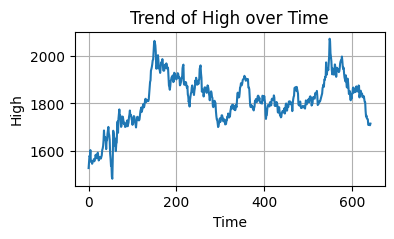

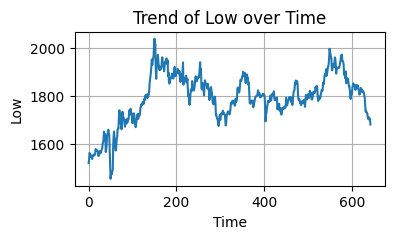

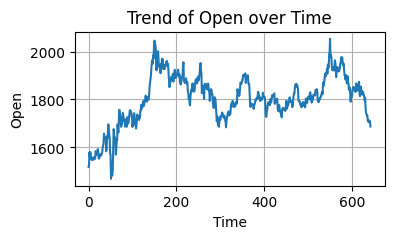

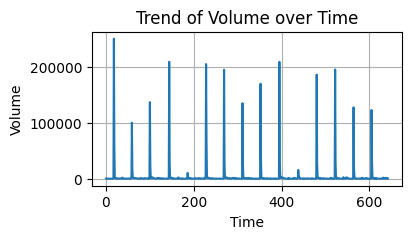

In [ ]:
# prompt: plot the data of High, Low, Open, Volume column to see the trend.

import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded as in the previous code

# Select the columns to plot
columns_to_plot = ['High', 'Low', 'Open', 'Volume']

# Create the plot
for column in columns_to_plot:
    plt.figure(figsize=(4, 2))  # Adjust figure size as needed
    plt.plot(data[column])
    plt.title(f'Trend of {column} over Time')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

From the above we can see that the `low, high and open` doesn't change that much. what if we can merge them into the TimeSeries Predictor?

## Feature Scaling - Min Max Scaling (Not Working)

Reasoning: Features with different scales can negatively impact model performance. Scaling ensures all features have a similar range.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# features = ['High', 'Low', 'Open', 'Volume']
# data[features] = scaler.fit_transform(data[features])

## Feature Engineering

In [ ]:
# Merge X_train and y_train based on 'Id'
data = pd.merge(data, y, on='Id')

In [ ]:
data = pd.read_csv('/content/X_test.csv')

## Pipeline for preprocessing

In [ ]:
# lets create two new features maximum day differing and difference of open and close price

data['maxdiff'] = data['High'] - data['Low']
data['daydiff'] = data['Close'] - data['Open']

import numpy as np
def RSI(series, period):
  delta = series.diff().dropna()
  u = delta * 0
  d = u.copy()
  u[delta > 0] = delta[delta > 0]
  d[delta < 0] = -delta[delta < 0]
  u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
  u = u.drop(u.index[:(period-1)])
  d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
  d = d.drop(d.index[:(period-1)])
  rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
       pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
  return 100 - 100 / (1 + rs)

data['RSI'] = RSI(data['Close'], 10)
data

data['RSI'].fillna(data['RSI'].min(), inplace=True)

# Createing Aroon index for the stock as a feature
def aroon(data, lb=25):

  df = data.copy()
  df['up'] = 100 * df.High.rolling(lb + 1).apply(lambda x: x.argmax()) / lb
  df['dn'] = 100 * df.Low.rolling(lb + 1).apply(lambda x: x.argmin()) / lb

  return df['up'], df['dn']

data['up'] , data['dn'] = aroon(data, lb=25)

data['up'].fillna(data['up'].min(), inplace=True)
data['dn'].fillna(data['dn'].min(), inplace=True)

data['EMA12'] = data['Close'].ewm(span=12, min_periods=12).mean()

data['EMA26'] = data['Close'].ewm(span=26, min_periods=26).mean()

data['MACD'] = data['EMA12'] - data['EMA26']

data['SignalLine'] = data['MACD'].ewm(span=9, min_periods=9).mean()

pr = [data['Close'][0]]
for pci in range(len(data) - 1):
  pr.append(data['Close'].iloc[pci])

data['prev_close'] = pr

In [ ]:
# lets create two new features maximum day differing and difference of open and close price

data['maxdiff'] = data['High'] - data['Low']
data['daydiff'] = data['Close'] - data['Open']

KeyError: 'Close'

RSI

In [ ]:
import numpy as np
def RSI(series, period):
  delta = series.diff().dropna()
  u = delta * 0
  d = u.copy()
  u[delta > 0] = delta[delta > 0]
  d[delta < 0] = -delta[delta < 0]
  u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
  u = u.drop(u.index[:(period-1)])
  d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
  d = d.drop(d.index[:(period-1)])
  rs = pd.DataFrame.ewm(u, com=period-1, adjust=False).mean() / \
       pd.DataFrame.ewm(d, com=period-1, adjust=False).mean()
  return 100 - 100 / (1 + rs)

data['RSI'] = RSI(data['Close'], 10)
data

,Id,High,Low,Open,Volume,Close,maxdiff,daydiff,RSI
0,0,1528.699951,1518.000000,1518.099976,214,1524.500000,10.699951,6.400024,NaN
1,1,1552.699951,1530.099976,1530.099976,107,1549.199951,22.599976,19.099976,NaN
2,2,1580.000000,1560.400024,1580.000000,416,1566.199951,19.599976,-13.800049,NaN
3,3,1576.300049,1558.300049,1558.300049,47,1571.800049,18.000000,13.500000,NaN
4,4,1604.199951,1552.300049,1579.699951,236,1557.400024,51.899902,-22.299927,NaN
...,...,...,...,...,...,...,...,...,...
638,638,1709.699951,1701.099976,1705.400024,721,1702.400024,8.599976,-3.000000,19.866773
639,639,1712.400024,1709.199951,1712.199951,264,1709.199951,3.200073,-3.000000,24.800186
640,640,1714.400024,1706.099976,1712.300049,1684,1710.000000,8.300049,-2.300049,25.400586
641,641,1708.500000,1699.500000,1707.099976,130,1699.500000,9.000000,-7.599976,22.751677


In [ ]:
data['RSI'].fillna(data['RSI'].min(), inplace=True)

<ipython-input-50-42a16ca75510>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RSI'].fillna(data['RSI'].min(), inplace=True)


Aroon

In [ ]:
# Createing Aroon index for the stock as a feature
def aroon(data, lb=25):

  df = data.copy()
  df['up'] = 100 * df.High.rolling(lb + 1).apply(lambda x: x.argmax()) / lb
  df['dn'] = 100 * df.Low.rolling(lb + 1).apply(lambda x: x.argmin()) / lb

  return df['up'], df['dn']

data['up'] , data['dn'] = aroon(data, lb=25)

data['up'].fillna(data['up'].min(), inplace=True)
data['dn'].fillna(data['dn'].min(), inplace=True)

<ipython-input-52-b63f921271c2>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['up'].fillna(data['up'].min(), inplace=True)
<ipython-input-52-b63f921271c2>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
data['EMA12'] = data['Close'].ewm(span=12, min_periods=12).mean()

data['EMA26'] = data['Close'].ewm(span=26, min_periods=26).mean()

data['MACD'] = data['EMA12'] - data['EMA26']

data['SignalLine'] = data['MACD'].ewm(span=9, min_periods=9).mean()

In [ ]:
pr = [data['Close'][0]]
for pci in range(len(data) - 1):
  pr.append(data['Close'].iloc[pci])

data['prev_close'] = pr

In [ ]:
data['prev_diff'] = data['Close'] - data['prev_close']

In [ ]:
data

,Id,High,Low,Open,Volume,Close,maxdiff,daydiff,RSI,up,dn,EMA12,EMA26,MACD,SignalLine,prev_close,prev_diff
0,0,1528.699951,1518.000000,1518.099976,214,1524.500000,10.699951,6.400024,17.385306,0.0,0.0,NaN,NaN,NaN,NaN,1524.500000,0.000000
1,1,1552.699951,1530.099976,1530.099976,107,1549.199951,22.599976,19.099976,17.385306,0.0,0.0,NaN,NaN,NaN,NaN,1524.500000,24.699951
2,2,1580.000000,1560.400024,1580.000000,416,1566.199951,19.599976,-13.800049,17.385306,0.0,0.0,NaN,NaN,NaN,NaN,1549.199951,17.000000
3,3,1576.300049,1558.300049,1558.300049,47,1571.800049,18.000000,13.500000,17.385306,0.0,0.0,NaN,NaN,NaN,NaN,1566.199951,5.600098
4,4,1604.199951,1552.300049,1579.699951,236,1557.400024,51.899902,-22.299927,17.385306,0.0,0.0,NaN,NaN,NaN,NaN,1571.800049,-14.400024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,638,1709.699951,1701.099976,1705.400024,721,1702.400024,8.599976,-3.000000,19.866773,8.0,100.0,1744.955924,1779.712089,-34.756164,-27.536440,1704.500000,-2.099976
639,639,1712.400024,1709.199951,1712.199951,264,1709.199951,3.200073,-3.000000,24.800186,4.0,96.0,1739.455005,1774.488968,-35.033962,-29.035945,1702.400024,6.799927
640,640,1714.400024,1706.099976,1712.300049,1684,1710.000000,8.300049,-2.300049,25.400586,0.0,92.0,1734.923466,1769.712007,-34.788541,-30.186464,1709.199951,0.800049
641,641,1708.500000,1699.500000,1707.099976,130,1699.500000,9.000000,-7.599976,22.751677,0.0,100.0,1729.473702,1764.511118,-35.037415,-31.156654,1710.000000,-10.500000


In [ ]:
col = data.columns
for i in col:
  data[f'{i}'] = data[f'{i}'].interpolate(method='linear')

for k in col[0:len(col) - 1]:
  data[k].fillna(data[k].min(), inplace=True)

data.head()

<ipython-input-60-222ad336a315>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[k].fillna(data[k].min(), inplace=True)


,Id,High,Low,Open,Volume,Close,maxdiff,daydiff,RSI,up,dn,EMA12,EMA26,MACD,SignalLine,prev_close,prev_diff
0,0,1528.699951,1518.000000,1518.099976,214,1524.500000,10.699951,6.400024,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1524.500000,0.000000
1,1,1552.699951,1530.099976,1530.099976,107,1549.199951,22.599976,19.099976,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1524.500000,24.699951
2,2,1580.000000,1560.400024,1580.000000,416,1566.199951,19.599976,-13.800049,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1549.199951,17.000000
3,3,1576.300049,1558.300049,1558.300049,47,1571.800049,18.000000,13.500000,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1566.199951,5.600098
4,4,1604.199951,1552.300049,1579.699951,236,1557.400024,51.899902,-22.299927,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1571.800049,-14.400024


In [ ]:
data['change_tomorrow'] = data['Close'].pct_change(-1)
data.change_tomorrow

,change_tomorrow
0,-0.015944
1,-0.010854
2,-0.003563
3,0.009246
4,0.003673
...,...
638,-0.003978
639,-0.000468
640,0.006178
641,-0.007707


In [ ]:
data.change_tomorrow = data.change_tomorrow * -1 # first value should be negative
data.head()

,Id,High,Low,Open,Volume,Close,maxdiff,daydiff,RSI,up,dn,EMA12,EMA26,MACD,SignalLine,prev_close,prev_diff,change_tomorrow
0,0,1528.699951,1518.000000,1518.099976,214,1524.500000,10.699951,6.400024,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1524.500000,0.000000,0.015944
1,1,1552.699951,1530.099976,1530.099976,107,1549.199951,22.599976,19.099976,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1524.500000,24.699951,0.010854
2,2,1580.000000,1560.400024,1580.000000,416,1566.199951,19.599976,-13.800049,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1549.199951,17.000000,0.003563
3,3,1576.300049,1558.300049,1558.300049,47,1571.800049,18.000000,13.500000,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1566.199951,5.600098,-0.009246
4,4,1604.199951,1552.300049,1579.699951,236,1557.400024,51.899902,-22.299927,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1571.800049,-14.400024,-0.003673


In [ ]:
# Percentage
data.change_tomorrow = data.change_tomorrow * 100
data.head()

,Id,High,Low,Open,Volume,Close,maxdiff,daydiff,RSI,up,dn,EMA12,EMA26,MACD,SignalLine,prev_close,prev_diff,change_tomorrow
0,0,1528.699951,1518.000000,1518.099976,214,1524.500000,10.699951,6.400024,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1524.500000,0.000000,1.594368
1,1,1552.699951,1530.099976,1530.099976,107,1549.199951,22.599976,19.099976,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1524.500000,24.699951,1.085430
2,2,1580.000000,1560.400024,1580.000000,416,1566.199951,19.599976,-13.800049,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1549.199951,17.000000,0.356286
3,3,1576.300049,1558.300049,1558.300049,47,1571.800049,18.000000,13.500000,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1566.199951,5.600098,-0.924620
4,4,1604.199951,1552.300049,1579.699951,236,1557.400024,51.899902,-22.299927,17.385306,0.0,0.0,1543.644609,1564.239102,-37.344751,-31.681349,1571.800049,-14.400024,-0.367344


In [ ]:
# deal with outlier clipp the data with 98 percentile mark
for i in col:
  data[f'{i}'] = data[f'{i}'].clip(lower=data[f'{i}'].quantile(0.02), upper=data[f'{i}'].quantile(0.98))

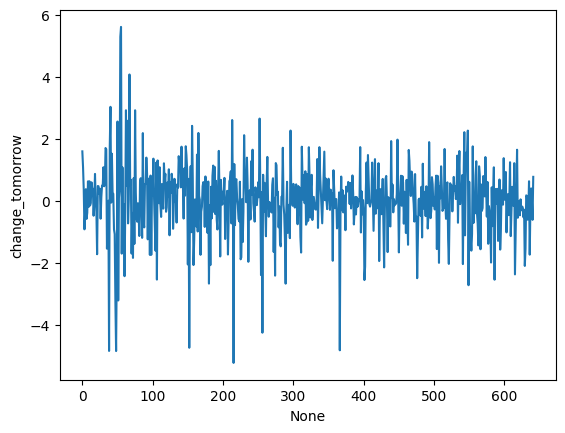

In [ ]:
import seaborn as sb

sb.lineplot(y=data['change_tomorrow'], x = data.index);

In [ ]:
data.change_tomorrow = np.where(data.change_tomorrow > 0, 1, -1)

In [ ]:
data

,Id,High,Low,Open,Volume,Close,maxdiff,daydiff,RSI,up,dn,EMA12,EMA26,MACD,SignalLine,prev_close,prev_diff,change_tomorrow
0,12.84,1558.800049,1547.363955,1553.535972,214.0,1552.035972,10.699951,6.400024,19.425999,0.0,0.0,1551.847445,1564.239102,-37.344751,-31.681349,1551.491963,0.000000,1
1,12.84,1558.800049,1547.363955,1553.535972,107.0,1552.035972,22.599976,19.099976,19.425999,0.0,0.0,1551.847445,1564.239102,-37.344751,-31.681349,1551.491963,24.699951,1
2,12.84,1580.000000,1560.400024,1580.000000,416.0,1566.199951,19.599976,-13.800049,19.425999,0.0,0.0,1551.847445,1564.239102,-37.344751,-31.681349,1551.491963,17.000000,1
3,12.84,1576.300049,1558.300049,1558.300049,47.0,1571.800049,18.000000,13.500000,19.425999,0.0,0.0,1551.847445,1564.239102,-37.344751,-31.681349,1566.199951,5.600098,-1
4,12.84,1604.199951,1552.300049,1579.699951,236.0,1557.400024,51.899902,-22.299927,19.425999,0.0,0.0,1551.847445,1564.239102,-37.344751,-31.681349,1571.800049,-14.400024,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,629.16,1709.699951,1701.099976,1705.400024,721.0,1702.400024,8.599976,-3.000000,19.866773,8.0,100.0,1744.955924,1779.712089,-34.756164,-27.536440,1704.500000,-2.099976,1
639,629.16,1712.400024,1709.199951,1712.199951,264.0,1709.199951,3.200073,-3.000000,24.800186,4.0,96.0,1739.455005,1774.488968,-35.033962,-29.035945,1702.400024,6.799927,1
640,629.16,1714.400024,1706.099976,1712.300049,1684.0,1710.000000,8.300049,-2.300049,25.400586,0.0,92.0,1734.923466,1769.712007,-34.788541,-30.186464,1709.199951,0.800049,-1
641,629.16,1708.500000,1699.500000,1707.099976,130.0,1699.500000,9.000000,-7.599976,22.751677,0.0,100.0,1729.473702,1764.511118,-35.037415,-31.156654,1710.000000,-10.500000,1


In [ ]:
data.to_csv('feature_engineering_stock.csv')

In [ ]:
data = pd.read_csv('/content/feature_engineering_stock.csv')

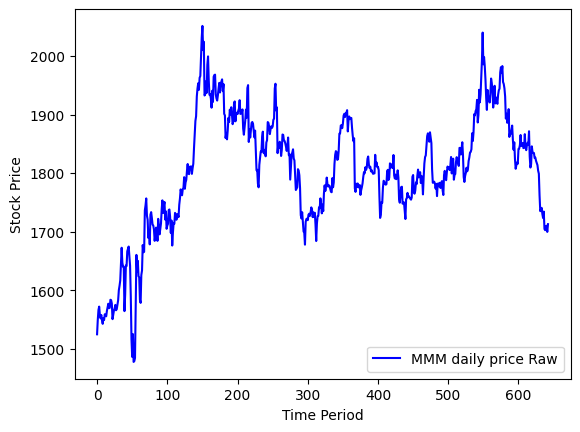

In [ ]:
# Visualize data

import matplotlib.pyplot as plt
plt.plot(y, color='blue', label='MMM daily price Raw')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. 

# Approach 1 : AutoGluon Time Series Predictor

In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
# Load your data into pandas DataFrames
X_train = pd.read_csv("/content/X_train.csv")
y_train = pd.read_csv("/content/y_train.csv")
X_test = pd.read_csv("/content/X_test.csv") # Assuming you have X_test

* TabularPredictor

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

from sklearn.preprocessing import StandardScaler

def preprocess_stock_data(X_train, y_train, X_test):
    """
    Preprocesses stock price data for AutoGluon.

    Args:
        X_train (pd.DataFrame): Training features (Id, High, Low, Open, Volume).
        y_train (pd.DataFrame): Training target (Id, Close).
        X_test (pd.DataFrame): Test features (Id, High, Low, Open, Volume).

    Returns:
        tuple: (train_data, test_data, predictor)
            train_data (pd.DataFrame): Combined training data.
            test_data (pd.DataFrame): Test data.
            predictor (TabularPredictor): AutoGluon TabularPredictor instance.
    """

    # Merge X_train and y_train based on 'Id'
    train_data = pd.merge(X_train, y_train, on='Id')

    # Drop 'Id' from train and test data (AutoGluon doesn't need it as a feature)
    train_data = train_data.drop('Id', axis=1)
    test_data = X_test.drop('Id', axis=1)

    # features = ['High', 'Low', 'Open', 'Volume']

    # Calculate the average of High, Low, and Open
    train_data['Avg_Price'] = (train_data['High'] + train_data['Low'] + train_data['Open']) / 3
    test_data['Avg_Price'] = (test_data['High'] + test_data['Low'] + test_data['Open']) / 3

    # Drop the original High, Low, and Open columns
    train_data = train_data.drop(['High', 'Low', 'Open'], axis=1)
    test_data = test_data.drop(['High', 'Low', 'Open'], axis=1)

    # Specify the target column
    target = 'Close'

    # Initialize the TabularPredictor
    predictor = TabularPredictor(label=target, eval_metric='mean_squared_error').fit(train_data)

    return train_data, test_data, predictor

def predict_stock_prices(X_train, y_train, X_test):
    """
    Trains an AutoGluon model and predicts stock prices.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.DataFrame): Training target.
        X_test (pd.DataFrame): Test features.

    Returns:
        pd.Series: Predicted stock prices.
    """
    train_data, test_data, predictor = preprocess_stock_data(X_train, y_train, X_test)

    # Make predictions on the test data
    predictions = predictor.predict(test_data)

    return predictions

In [ ]:
# Predict stock prices
predictions = predict_stock_prices(X_train, y_train, X_test)

No path specified. Models will be saved in: "AutogluonModels/ag-20250301_104546"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.03 GB / 12.67 GB (79.2%)
Disk Space Avail:   70.77 GB / 107.72 GB (65.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions 

[1000]	valid_set's l2: 244.219
[2000]	valid_set's l2: 234.203
[3000]	valid_set's l2: 232.559
[4000]	valid_set's l2: 232.427


	-230.6736	 = Validation score   (-mean_squared_error)
	1.04s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...
	-213.2291	 = Validation score   (-mean_squared_error)
	0.43s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-181.0108	 = Validation score   (-mean_squared_error)
	0.69s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: CatBoost ...
	-169.2465	 = Validation score   (-mean_squared_error)
	0.48s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-178.5478	 = Validation score   (-mean_squared_error)
	0.65s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-196.9974	 = Validation score   (-mean_squared_error)
	0.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-161.0976	 = Validation score   (-mean_squared_error)
	0.32s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTo

In [ ]:
data = pd.read_csv('/content/feature_engineering_stock.csv')

In [ ]:
# Print the predictions
print(predictions)

0      1721.081177
1      1726.010498
2      1721.773804
3      1720.825928
4      1735.138306
          ...     
638    2039.369629
639    2039.386963
640    2041.400146
641    2039.964600
642    2039.894043
Name: Close, Length: 643, dtype: float32


In [ ]:
#If you need to add the Id back to the prediction results.
predictions_with_id = pd.DataFrame({'Id': X_test['Id'].values, 'Close': predictions.values})
print(predictions_with_id)

       Id        Close
0     643  1721.081177
1     644  1726.010498
2     645  1721.773804
3     646  1720.825928
4     647  1735.138306
..    ...          ...
638  1281  2039.369629
639  1282  2039.386963
640  1283  2041.400146
641  1284  2039.964600
642  1285  2039.894043

[643 rows x 2 columns]


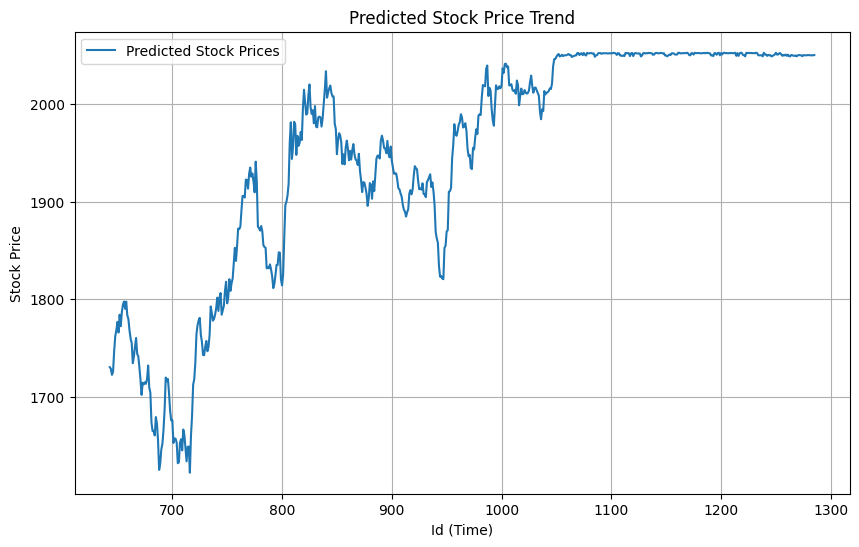

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'predictions_with_id' DataFrame is already created

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(predictions_with_id['Id'], predictions_with_id['Close'], label='Predicted Stock Prices')
plt.xlabel("Id (Time)")
plt.ylabel("Stock Price")
plt.title("Predicted Stock Price Trend")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Save predictions to a CSV file
predictions_with_id.to_csv('sum_submission.csv', index=False)

## Iterative Predictions

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

def preprocess_stock_data(train_data, X_test):
    """
    Preprocesses stock price data for AutoGluon.

    Args:
        train_data (pd.DataFrame): Training data with 'Close' as target.
        X_test (pd.DataFrame): Test features.

    Returns:
        tuple: (train_data, test_data, predictor)
    """

    # Drop 'Id' if it exists in both train_data and X_test
    if 'Id' in train_data.columns and 'Id' in X_test.columns:
        train_data = train_data.drop('Id', axis=1)
        X_test = X_test.drop('Id', axis=1)

    # Specify the target column
    target = 'Close'

    # Initialize the TabularPredictor
    predictor = TabularPredictor(label=target, eval_metric='mean_squared_error').fit(train_data)

    return train_data, X_test, predictor

def predict_stock_prices(train_dataset, X_test):
    """
    Predicts stock prices using iterative prediction.

    Args:
        train_dataset (pd.DataFrame): Training data with 'Close' as target.
        X_test (pd.DataFrame): Test features.

    Returns:
        pd.Series: Predicted stock prices.
    """

    train_data, test_data, predictor = preprocess_stock_data(train_dataset, X_test)

    # Create a copy of test_data to avoid modifying the original
    test_data_copy = test_data.copy()

    predictions = []
    for i in range(len(test_data_copy)):
        # Make prediction for current row
        current_row = test_data_copy.iloc[[i]]
        prediction = predictor.predict(current_row)[0]
        predictions.append(prediction)

        # Update features for next row (if applicable)
        if i < len(test_data_copy) - 1:
            # Assuming you want to use predicted 'Close' as a feature for the next row
            test_data_copy.loc[test_data_copy.index[i + 1], 'Close_Lag1'] = prediction

    return pd.Series(predictions, index=test_data.index)

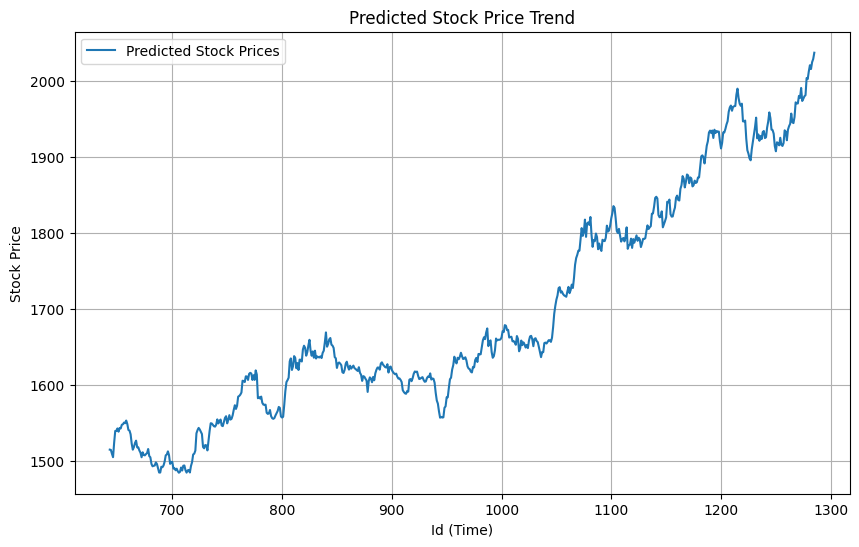

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=1, # 24 hours
    path="autogluon-m4-hourly",
    target="Close",
    eval_metric="MSE",
    freq="D",
)

predictor.fit(
    train_tsdf, # pass the merged DataFrame here with target column
    presets="medium_quality",
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to '/content/autogluon-m4-hourly'
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
GPU Count:          1
Memory Avail:       10.66 GB / 12.67 GB (84.1%)
Disk Space Avail:   74.70 GB / 112.64 GB (66.3%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MSE,
 'freq': 'D',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 1,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': False,
 'target': 'Close',
 'time_limit': 600,
 'verbosity': 2}

train_data with frequency 'None' has been resampled to freque

ValueError: At least some time series in train_data must have >= 6 observations. Please provide longer time series as train_data or reduce prediction_length, num_val_windows, or val_step_size.

# Chronos Time-Series

## Data Pre-processing
Now we need to do data cleaning and preprocessing on the raw data. Note that this part could vary for different dataset.

For the stock price data we're using, the processing contains 2 parts:

1.   Data normalization such that the normalized stock prices fall in the range of 0 to 1
2.   Extract time series of given window size

We generate a built-in TSDataset to complete the whole processing.



In [ ]:
from zoo.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

# Assuming your data is in a DataFrame called 'data'
# with columns 'date' for datetime and 'close' for the target variable
df = data[['date', 'close']]

# Create the TSDataset
tsdata_train, _, tsdata_test = TSDataset.from_pandas(
    df,
    dt_col="date",  # Replace with your datetime column name
    target_col="close",  # Replace with your target column name
    with_split=True,
    test_ratio=0.2
)

# Data scaling
minmax_scaler = MinMaxScaler()
for tsdata in [tsdata_train, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)) \
          .roll(lookback=50, horizon=1)  # Adjust lookback and horizon as needed

X_train, y_train = tsdata_train.to_numpy()
X_test, y_test = tsdata_test.to_numpy()

TypeError: code expected at least 16 arguments, got 15

In [ ]:
import pandas as pd
import numpy as np
from zoo.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

# Create a range of values as a substitute for the date column
date_range = pd.date_range(start='2013-01-01', periods=len(y), freq='D')

# Convert y to a DataFrame with the date_range as index
y = y.set_index(date_range)
y.columns = ['close']  # Rename the column to 'close'

# Create the TSDataset
tsdata_train, _, tsdata_test = TSDataset.from_pandas(
    y,
    dt_col=y.index.name,  # Use the index name as dt_col
    target_col="close",
    with_split=True,
    test_ratio=0.2
)

# Data scaling
minmax_scaler = MinMaxScaler()
for tsdata in [tsdata_train, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train)) \
          .roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_test, y_test = tsdata_test.to_numpy()

ImportError: cannot import name 'MutableMapping' from 'collections' (/usr/lib/python3.11/collections/__init__.py)